In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [2]:
ha_list = [('8133-12705', 0.130943), ('8137-9101', 0.118865), ('8256-12704', 0.12611), ('8616-3703', 0.135063),
             ('8720-12702', 0.134953), ('8721-3701', 0.118101)]

ha_list_uncertain = ['8155-6103(?)', '8254-6103(?)', '8338-12705(?)', '8606-12704(?)']

ha_list2 = [('7815-6103', 0.135043), ('7991-12705', 0.113153), ('7992-9102', 0.119399), ('8132-6101', 0.129403),
             ('8132-12703', 0.116056), ('8133-12704', 0.134471), ('8135-1902', 0.117997), ('8137-3702', 0.131997),
             ('8143-6101', 0.126168), ('8244-12704', 0.115137), ('8318-6102', 0.12908), ('8329-6102', 0.142887),
             ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), ('9049-1901', 0.131457)]

ha_list2_uncertain = ['8454-6102(?)', '8552-9102(?)', '8717-1902(?)']

In [3]:
def spectrum_gen(flux, ivar):    
    n = len(flux)
    sumflux = np.zeros(4563)

    for i in range(n):
        for j in range(n):
            flux_ = flux[i,j] * ~do_not_use[i,j]
            flux_filtered = sigma_gen_compare(ivar[i,j], flux_)
            sumflux = np.add(sumflux, flux_)
    return sumflux

In [4]:
def sigma_gen_compare(ivar, flux_masked):
    
    # change ivar array to sigma array 
    
    sigma = np.sqrt(np.abs(np.divide(1, ivar, where = ivar != 0)))
#     print(sigma)
    
    is_less_than_3sigma = flux_masked < 3 * sigma # compare the sigma array 
#     print(flux_masked)
#     print(is_less_than_3sigma)
        
    flux_masked_filtered = flux_masked * ~is_less_than_3sigma # multiply the truth value
    
    return flux_masked_filtered

In [5]:
def gaussian(x, amp, mean, sigma, base):
    return (amp * np.exp(-(x-mean)**2 / (2*sigma**2))) + base

In [6]:
(6583+6548)/2, 6583-6548, 6555, 6575

(6565.5, 35, 6555, 6575)

In [7]:
k = np.array([1,2,3,4,5,6])
np.average(k)

3.5

In [9]:
# np.where(np.logical_and(wave > 6555, wave < 6576))

In [11]:
# wave[2577], wave[2590]

In [12]:
lb = 2577
ub = 2590

popt [1.31671572e+02 7.42484034e+03 2.77910218e+00 9.12032991e+01]
pcov [[ 3.11069574e+01 -3.73964799e-04 -1.23549750e-01 -7.91925065e+00]
 [-3.73964799e-04  1.51319529e-02 -1.01392242e-05  5.34750341e-04]
 [-1.23549750e-01 -1.01392242e-05  2.49341958e-02 -3.30371980e-01]
 [-7.91925065e+00  5.34750341e-04 -3.30371980e-01  1.11361154e+01]]


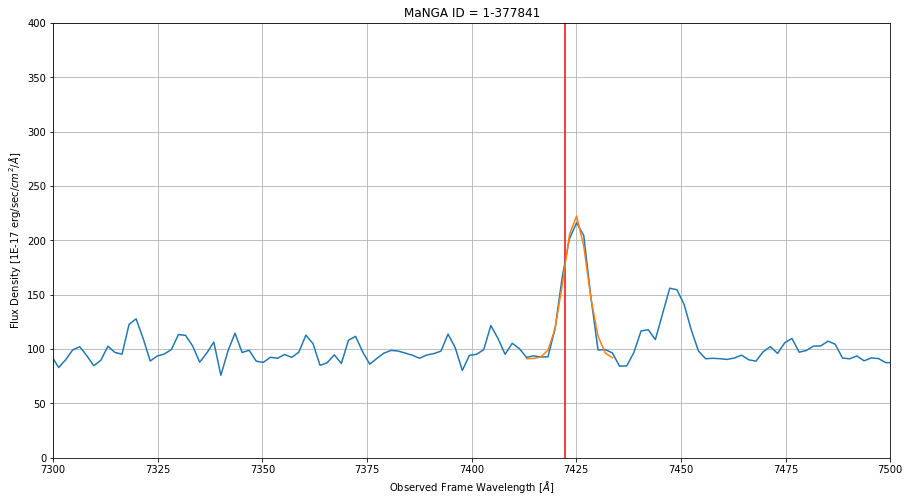

popt [-12316.34646923   7342.19664066   -463.16551607  12422.17413826]
pcov [[-1.00934255e+18  7.37151129e+09 -1.91703005e+16  1.00934255e+18]
 [ 7.37151146e+09  1.20065836e+03  1.40044332e+08 -7.37151158e+09]
 [-1.91703005e+16  1.40044329e+08 -3.64098802e+14  1.91703005e+16]
 [ 1.00934255e+18 -7.37151141e+09  1.91703005e+16 -1.00934256e+18]]


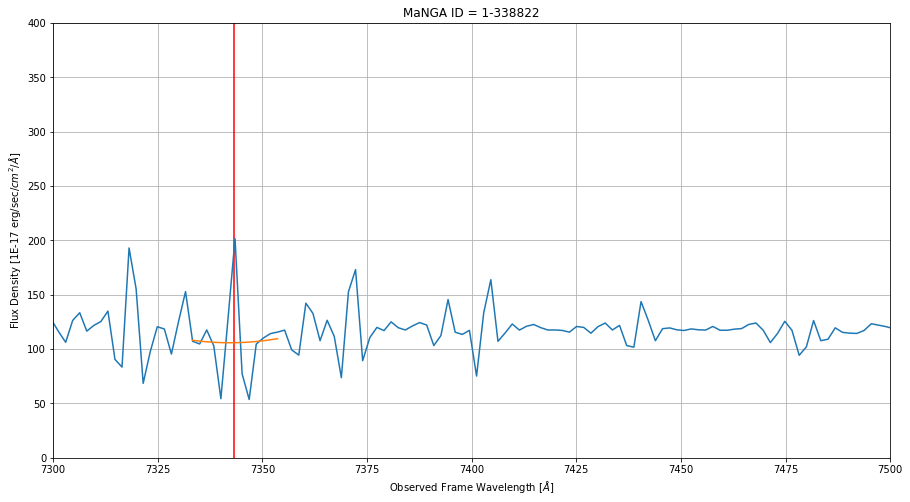

popt [5.36895476e+01 7.39186077e+03 3.28244926e+00 1.69807629e+02]
pcov [[ 1.19352933e+01 -2.08066663e-03  5.86587820e-02 -4.78632736e+00]
 [-2.08066663e-03  4.22637252e-02 -2.05012254e-04  2.77839334e-03]
 [ 5.86587820e-02 -2.05012254e-04  8.96846069e-02 -5.60619487e-01]
 [-4.78632736e+00  2.77839334e-03 -5.60619487e-01  6.63269541e+00]]


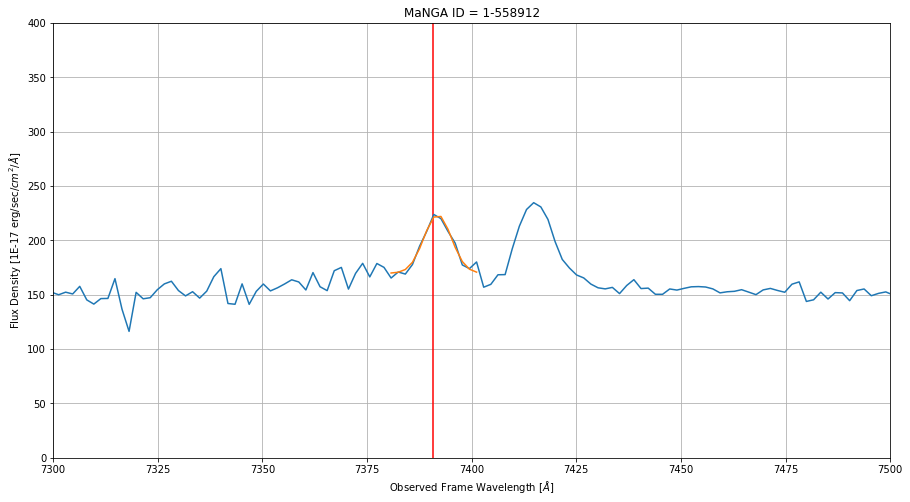

popt [ 521.26788472 7450.72393049   14.2343719  -323.20259033]
pcov [[ 3.93760691e+06 -2.74472061e+02  6.02709998e+04 -3.94918399e+06]
 [-2.74472061e+02  2.11186379e-01 -4.06766105e+00  2.74858050e+02]
 [ 6.02709998e+04 -4.06766105e+00  9.24045535e+02 -6.04562986e+04]
 [-3.94918399e+06  2.74858050e+02 -6.04562986e+04  3.96086980e+06]]


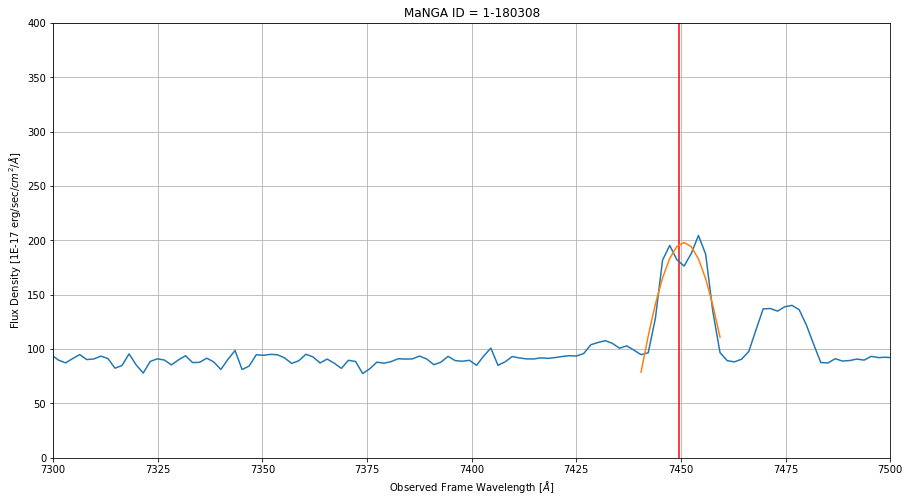

popt [5.12137797e+01 7.45142833e+03 3.88620356e+00 8.82656481e+01]
pcov [[ 7.80057468e+01 -2.22841863e-01  1.80079873e+00 -4.32011991e+01]
 [-2.22841863e-01  3.41901410e-01 -1.66440083e-02  2.42905305e-01]
 [ 1.80079873e+00 -1.66440083e-02  8.56917944e-01 -5.29704921e+00]
 [-4.32011991e+01  2.42905305e-01 -5.29704921e+00  5.56776811e+01]]


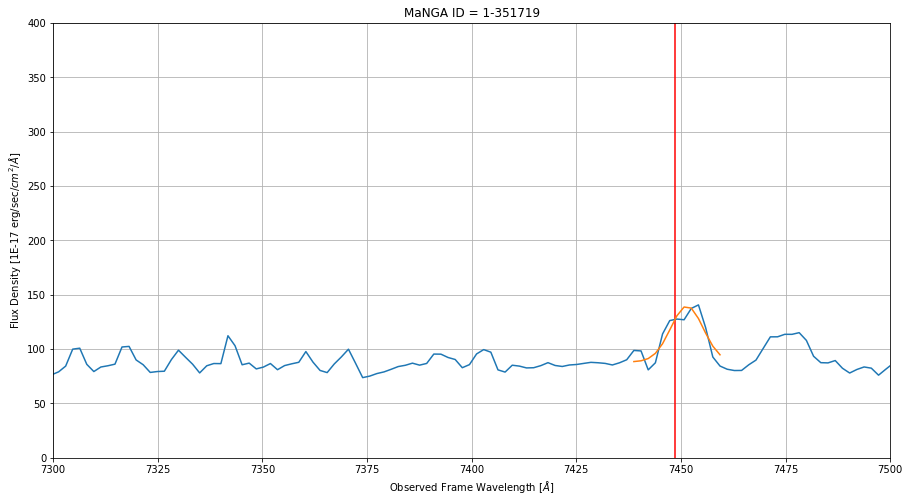

popt [1.10021866e+02 7.34069495e+03 3.50248777e+00 8.95501664e+01]
pcov [[ 1.58402212e+02 -1.02104279e-01  7.36858148e-01 -7.16827642e+01]
 [-1.02104279e-01  1.40734967e-01 -3.81190083e-03  1.17444980e-01]
 [ 7.36858148e-01 -3.81190083e-03  3.06030996e-01 -3.93537121e+00]
 [-7.16827642e+01  1.17444980e-01 -3.93537121e+00  9.48636023e+01]]


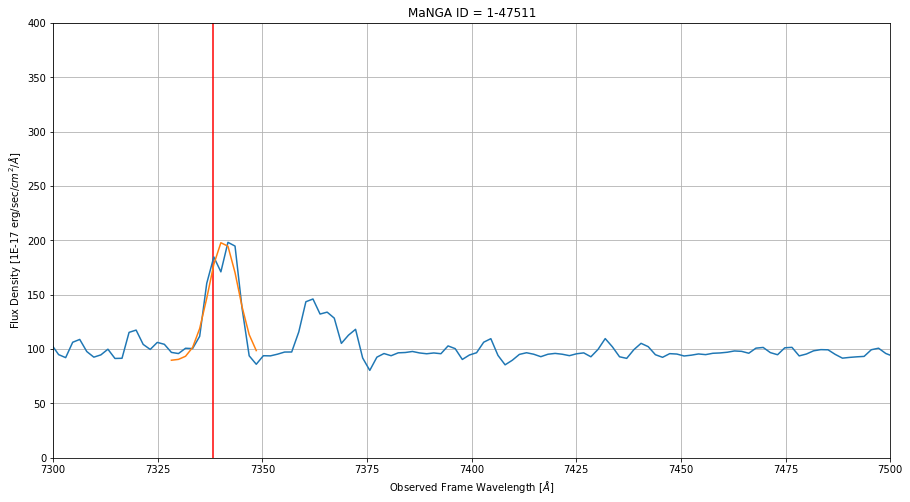

In [81]:
for plateifu in ha_list:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak = 6563*(1+plateifu[1])
#     print(peak)
    bound = np.where(np.logical_and(wave > peak-10, wave < peak+13))
    lb = bound[0][0]
    ub = bound[0][-1]
#     print(lb, ub)
#     print(wave[lb], wave[ub])
    
    sumflux_slice = sumflux[lb : ub]
#     print(sumflux_slice)
    wave_slice = wave[lb : ub]
    
# #     print(sumflux)
    
    amp = max(sumflux_slice)
    mean = peak
    sigma = 5
#     sigma = np.std(sumflux_slice)
    base = min(sumflux_slice)
    
#     print('amp', amp)
#     print('sigma', sigma)
#     print('base', base)
    
    popt, pcov = curve_fit(gaussian, wave_slice, sumflux_slice, p0 = [amp, mean, sigma, base])
    print('popt', popt)
    print('pcov', pcov)
    
#     plt.plot(wave_slice, gaussian(wave_slice, *popt))
#     plt.show()
    
#     print(sumflux, len(sumflux))
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red')
#     plt.axvline(6548*(1+plateifu[1]), color = 'green')
#     plt.axvline(6583*(1+plateifu[1]), color = 'green')
#     plt.axvline(wave[lb], color = 'deeppink')
#     plt.axvline(wave[ub], color = 'deeppink')
#     plt.xlim(6300,6700)
    plt.xlim(7300, 7500)
#     plt.xlim(wave[lb]-10, wave[ub]+10)
    plt.ylim(0,400)
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    plt.plot(wave_slice, gaussian(wave_slice, *popt))
    
    plt.show()

popt [2.50424727e+02 7.45116640e+03 2.89477897e+00 6.81874202e+01]
pcov [[ 4.61545185e+01 -1.32957990e-03 -1.40864232e-02 -1.58286236e+01]
 [-1.32957990e-03  6.19485006e-03 -2.50054695e-05  1.78736810e-03]
 [-1.40864232e-02 -2.50054695e-05  1.18689814e-02 -3.53315767e-01]
 [-1.58286236e+01  1.78736810e-03 -3.53315767e-01  2.20157560e+01]]


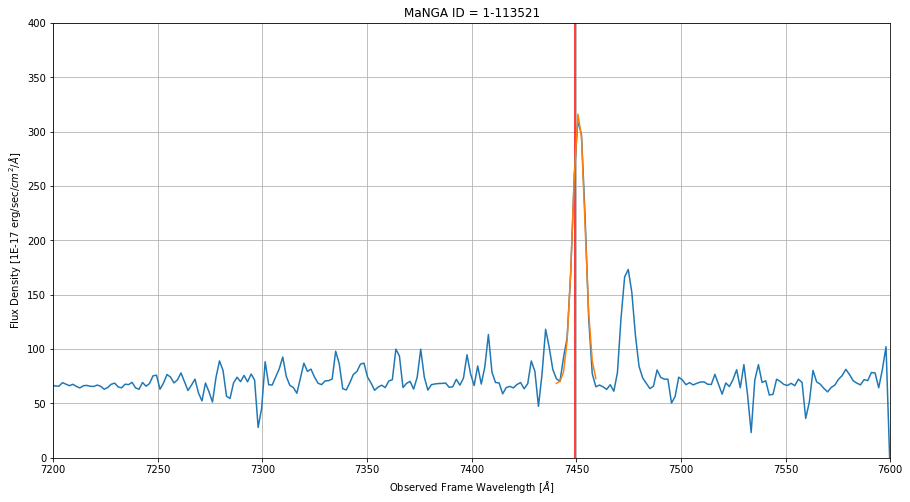

popt [ 25649.26815548   7308.03169536    217.84106658 -25501.96105681]
pcov [[ 1.52596727e+15 -1.58966911e+07  6.48406042e+12 -1.52596741e+15]
 [-1.58966911e+07  1.69091633e+00 -6.75210516e+04  1.58966912e+07]
 [ 6.48406042e+12 -6.75210516e+04  2.75517327e+10 -6.48406102e+12]
 [-1.52596741e+15  1.58966912e+07 -6.48406102e+12  1.52596755e+15]]


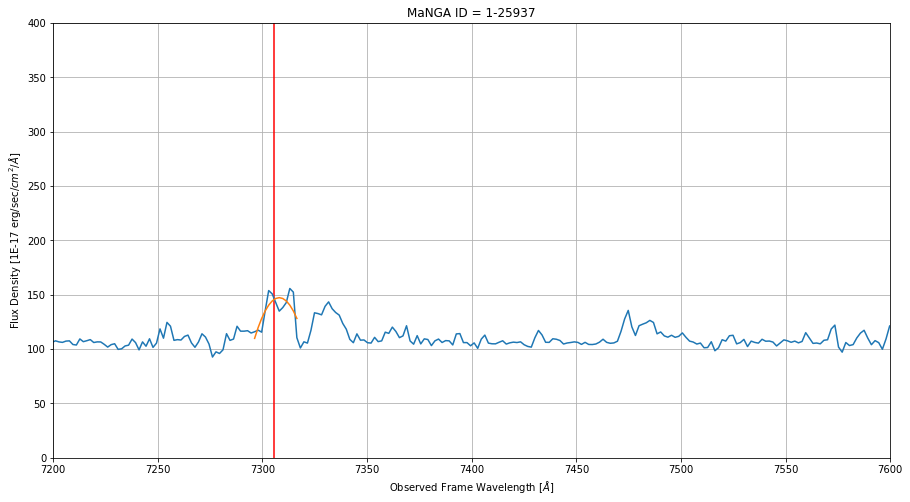

popt [4.57061846e+01 7.34851773e+03 2.05668449e+00 1.20081209e+02]
pcov [[ 3.16357159e+02  4.06952872e-04 -5.73013827e+00 -4.42997579e+01]
 [ 4.06952872e-04  7.69590068e-01  1.91143926e-04  6.37727723e-05]
 [-5.73013827e+00  1.91143926e-04  1.02270310e+00 -3.98352968e+00]
 [-4.42997579e+01  6.37727723e-05 -3.98352968e+00  6.26232614e+01]]


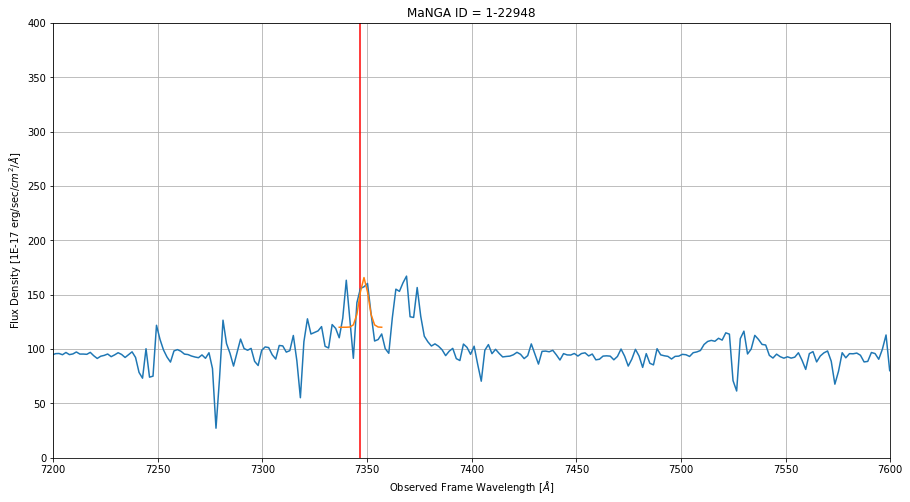

popt [ 92976.23867275   7414.82828897    396.67233472 -92812.16554533]
pcov [[ 1.26262842e+17 -1.85396753e+08  2.69396479e+14 -1.26262841e+17]
 [-1.85396749e+08  1.93142501e+00 -3.95513971e+05  1.85396747e+08]
 [ 2.69396479e+14 -3.95513958e+05  5.74788772e+11 -2.69396479e+14]
 [-1.26262841e+17  1.85396753e+08 -2.69396479e+14  1.26262841e+17]]


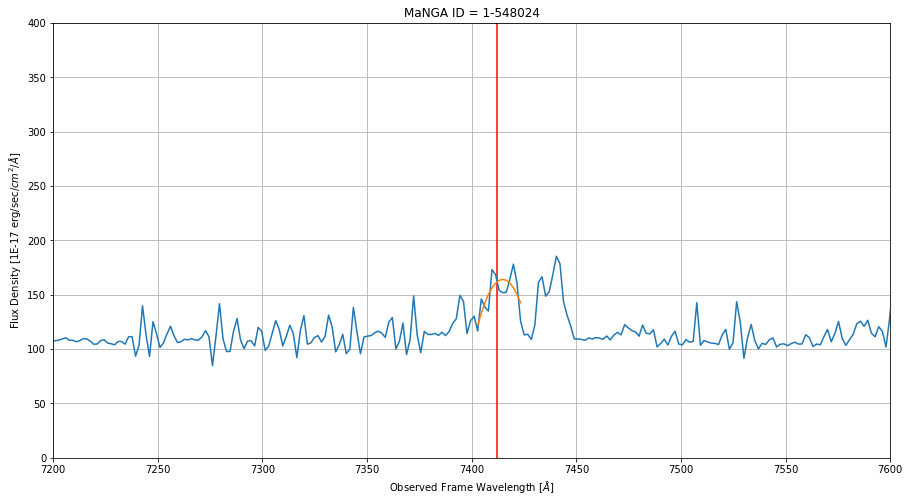

popt [3.12526508e+02 7.32742080e+03 3.09682552e+00 9.70246649e+01]
pcov [[ 3.45268473e+02 -2.89452100e-02 -1.84264941e-01 -1.15447216e+02]
 [-2.89452100e-02  3.40397332e-02 -3.80865878e-04  3.49826648e-02]
 [-1.84264941e-01 -3.80865878e-04  6.21164157e-02 -2.09061710e+00]
 [-1.15447216e+02  3.49826648e-02 -2.09061710e+00  1.56632966e+02]]


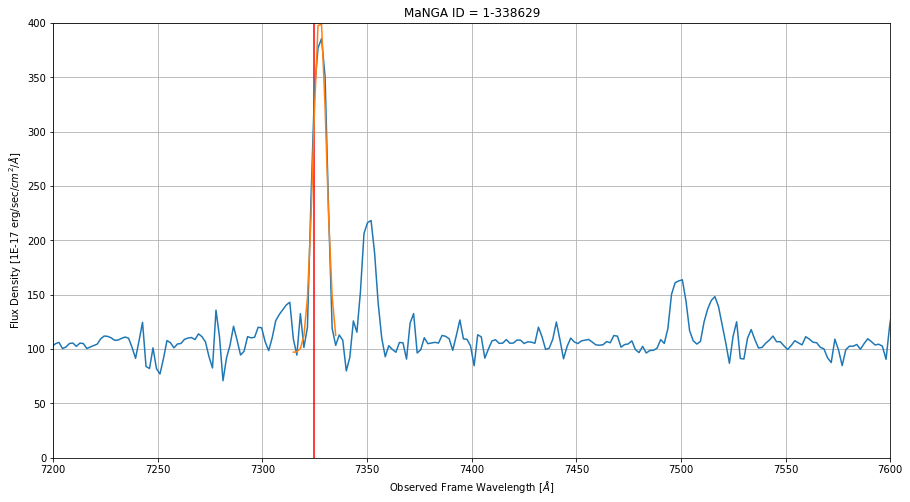

popt [3.26014671e+01 7.44571302e+03 3.53570655e+00 1.06366212e+02]
pcov [[ 1.67112459e+01  2.00402760e-02  8.15311225e-01 -1.02789317e+01]
 [ 2.00402760e-02  1.41041257e-01  3.31087635e-03 -2.49569243e-02]
 [ 8.15311225e-01  3.31087635e-03  4.21919504e-01 -1.95850554e+00]
 [-1.02789317e+01 -2.49569243e-02 -1.95850554e+00  1.37017885e+01]]


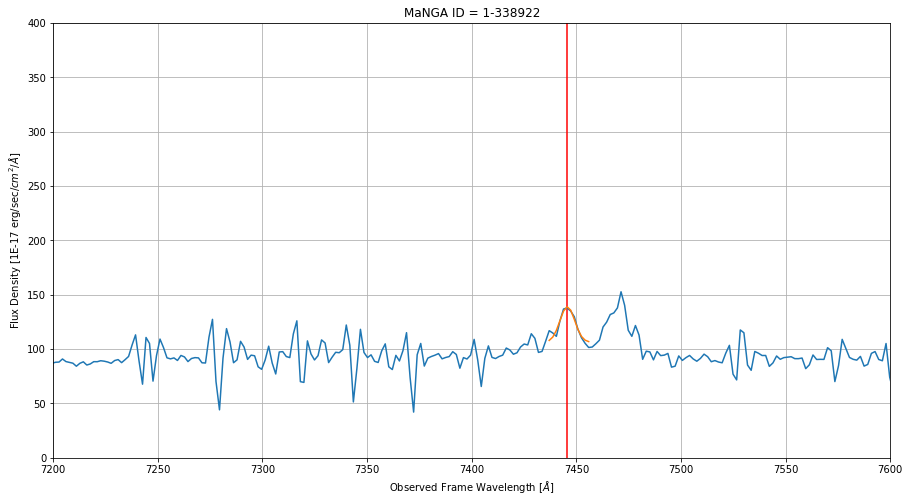

popt [ 265296.49344412    7340.58282287     334.46231166 -264287.52497745]
pcov [[ 5.28267078e+15 -2.32148894e+06  3.33091210e+12 -5.28267087e+15]
 [-2.32148902e+06  2.17903586e-02 -1.46317944e+03  2.32148898e+06]
 [ 3.33091210e+12 -1.46317938e+03  2.10025877e+09 -3.33091215e+12]
 [-5.28267087e+15  2.32148880e+06 -3.33091215e+12  5.28267096e+15]]


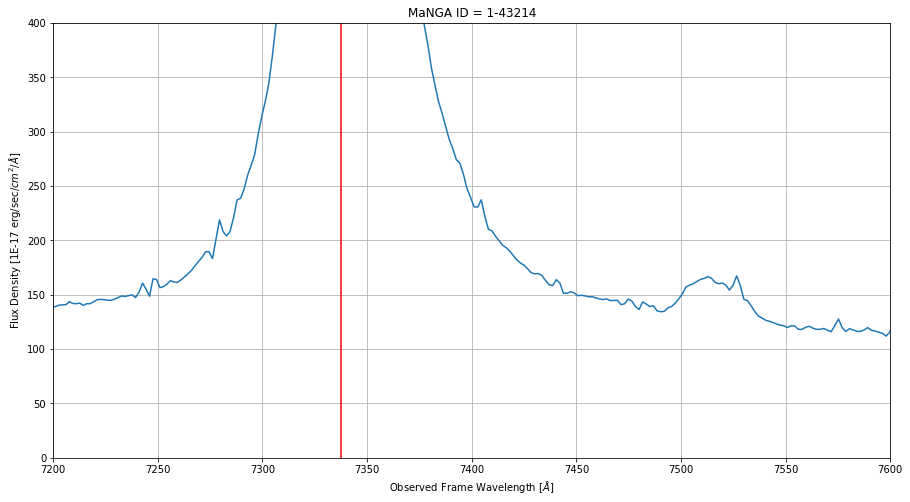

popt [5.99938890e+01 7.43309469e+03 3.95359702e+00 9.45799602e+01]
pcov [[ 7.70910153e+01 -2.63619470e-01  1.32833088e+00 -4.17416666e+01]
 [-2.63619470e-01  2.57152061e-01 -1.17816695e-02  2.62970761e-01]
 [ 1.32833088e+00 -1.17816695e-02  6.14845482e-01 -4.26312580e+00]
 [-4.17416666e+01  2.62970761e-01 -4.26312580e+00  5.29618944e+01]]


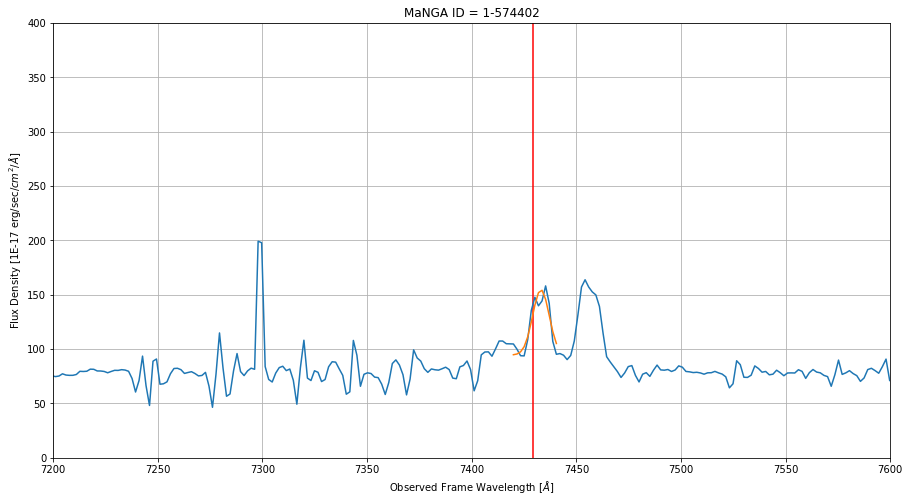

popt [8.28624389e+01 7.39344548e+03 3.12848943e+00 1.73951979e+02]
pcov [[ 1.78955165e+01 -6.48587896e-03  7.65819856e-02 -7.60736149e+00]
 [-6.48587896e-03  2.33433290e-02 -3.57878961e-04  8.10242786e-03]
 [ 7.65819856e-02 -3.57878961e-04  5.01535186e-02 -5.24986642e-01]
 [-7.60736149e+00  8.10242786e-03 -5.24986642e-01  1.03212436e+01]]


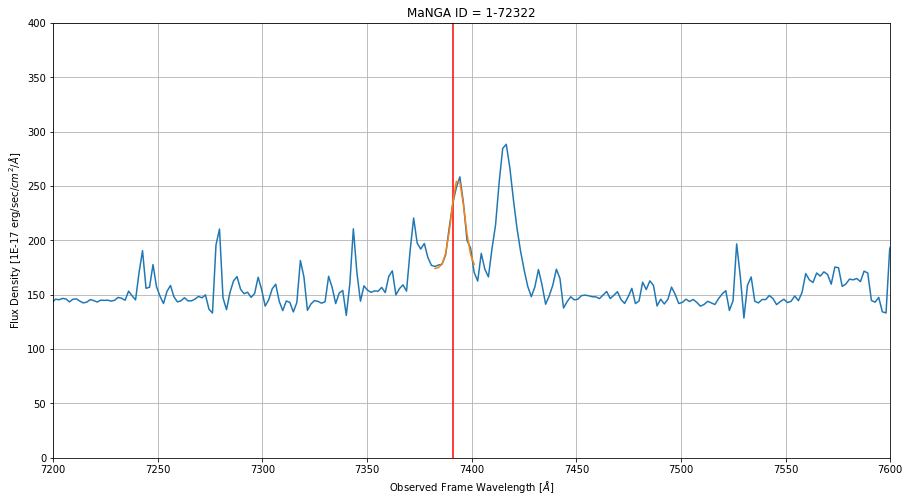

popt [ 6.08381093e+05  7.32034662e+03  4.85254132e+02 -6.08094996e+05]
pcov [[ 5.44839614e+17  5.38566310e+07  2.17310959e+14 -5.44839615e+17]
 [ 5.38566399e+07  2.95824193e-01  2.14854817e+04 -5.38566406e+07]
 [ 2.17310959e+14  2.14854740e+04  8.66751480e+10 -2.17310960e+14]
 [-5.44839615e+17 -5.38566915e+07 -2.17310960e+14  5.44839616e+17]]


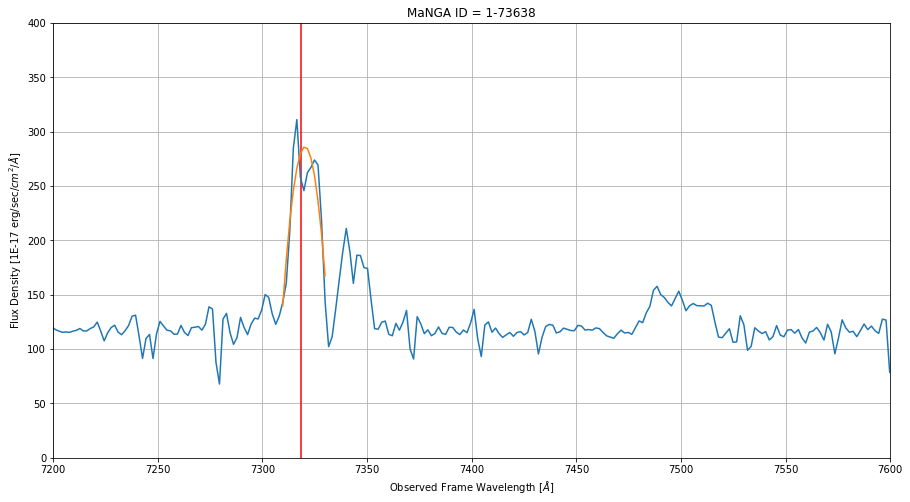

popt [1.32073362e+02 7.41510229e+03 2.93737611e+00 1.69389282e+02]
pcov [[ 1.05116952e+01 -1.16505656e-02 -4.69149574e-02 -3.04455357e+00]
 [-1.16505656e-02  5.37083123e-03  1.00138610e-04  7.83370446e-03]
 [-4.69149574e-02  1.00138610e-04  8.57849345e-03 -1.02403726e-01]
 [-3.04455357e+00  7.83370446e-03 -1.02403726e-01  3.83133651e+00]]


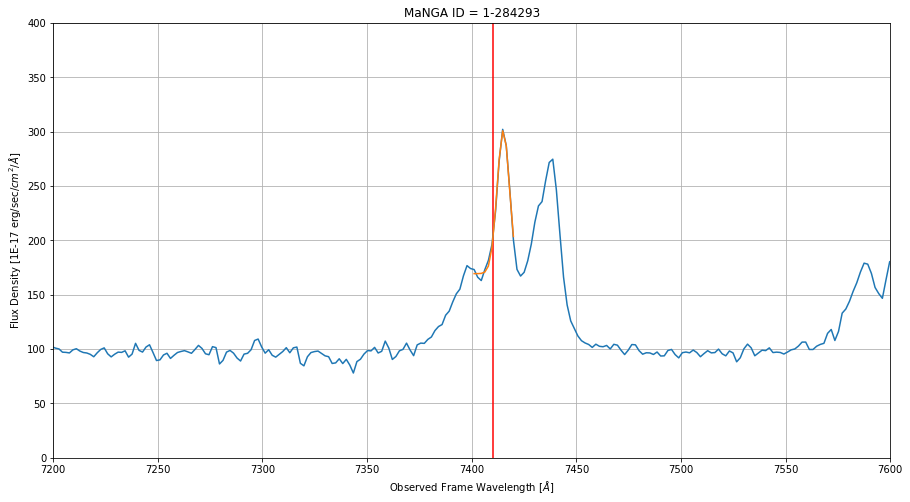

popt [  68.34842461 7505.60618676    7.94520449   81.65237333]
pcov [[ 2.80969260e+02  2.99793581e-01  2.97405885e+01 -2.96106308e+02]
 [ 2.99793581e-01  2.47872117e-01  2.42218026e-01 -5.37714636e-01]
 [ 2.97405885e+01  2.42218026e-01  3.68707631e+00 -3.26653815e+01]
 [-2.96106308e+02 -5.37714636e-01 -3.26653815e+01  3.17745493e+02]]


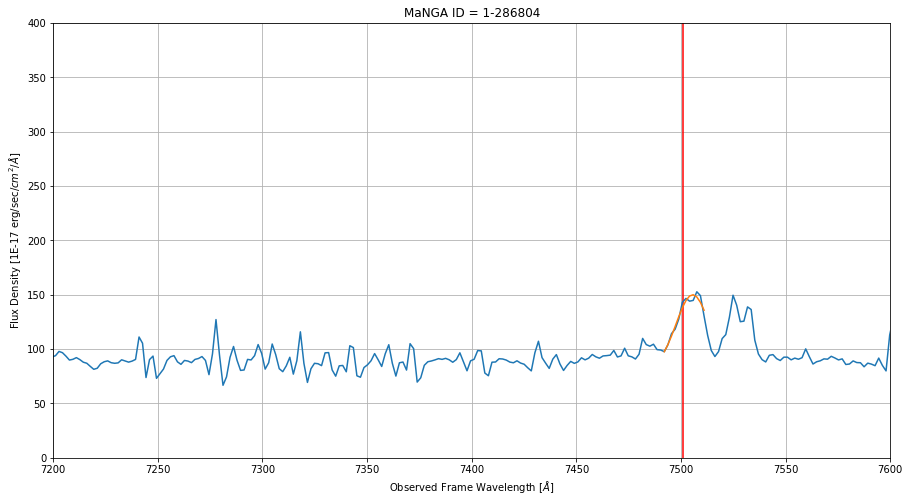

popt [1.75129578e+02 7.47505559e+03 3.13936897e+00 7.57644275e+01]
pcov [[ 7.36217570e+01 -5.93188111e-03 -5.58058356e-02 -2.47769830e+01]
 [-5.93188111e-03  2.38346220e-02 -1.63051407e-04  7.65823487e-03]
 [-5.58058356e-02 -1.63051407e-04  4.45793184e-02 -8.40838001e-01]
 [-2.47769830e+01  7.65823487e-03 -8.40838001e-01  3.41506277e+01]]


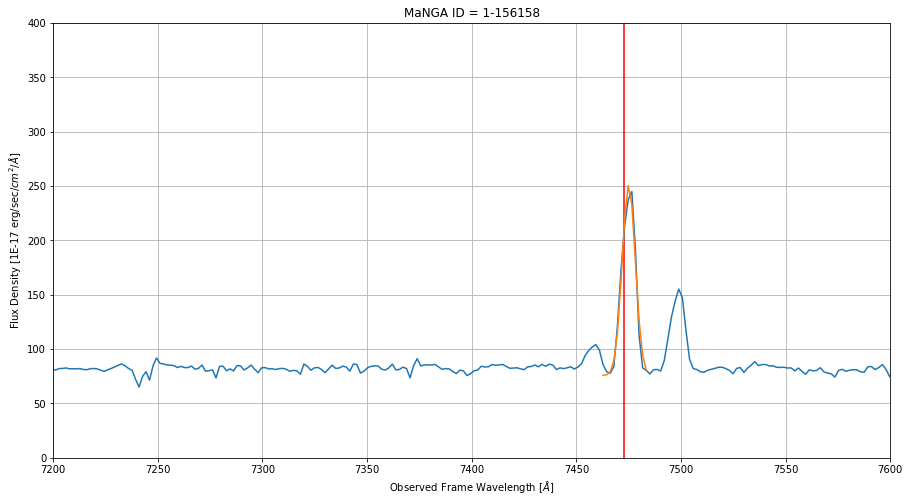

popt [1.50103479e+02 7.47227550e+03 2.30155117e+00 1.42702572e+02]
pcov [[ 7.30648824e+02  1.88937606e-03 -3.31606027e+00 -1.43790381e+02]
 [ 1.88937606e-03  1.97123535e-01  1.03792513e-04 -2.22029331e-03]
 [-3.31606027e+00  1.03792513e-04  2.92190750e-01 -4.39249658e+00]
 [-1.43790381e+02 -2.22029331e-03 -4.39249658e+00  2.02965238e+02]]


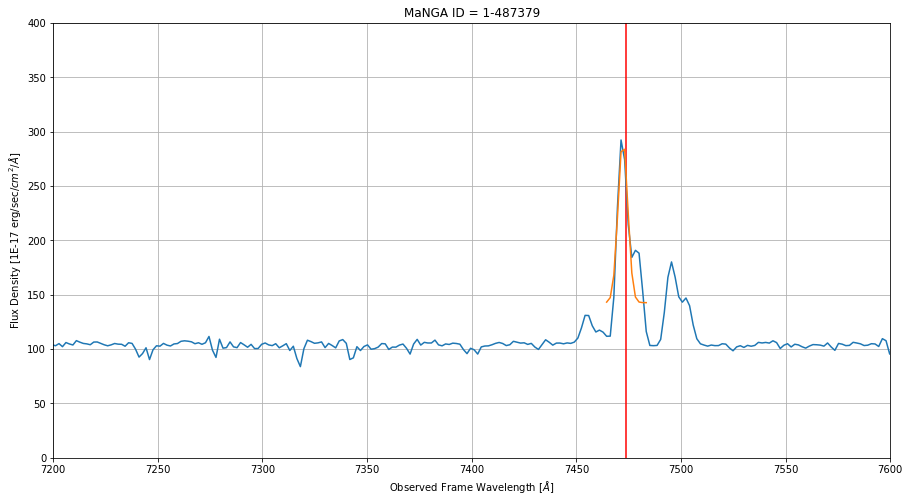

popt [2.65784375e+02 7.38947426e+03 4.10146473e+00 1.10481760e+02]
pcov [[ 3.42496918e+02 -2.27266159e-01  2.65347492e+00 -2.29681287e+02]
 [-2.27266159e-01  5.16355160e-02 -3.73144677e-03  2.53424843e-01]
 [ 2.65347492e+00 -3.73144677e-03  1.59520440e-01 -5.57143630e+00]
 [-2.29681287e+02  2.53424843e-01 -5.57143630e+00  2.92700098e+02]]


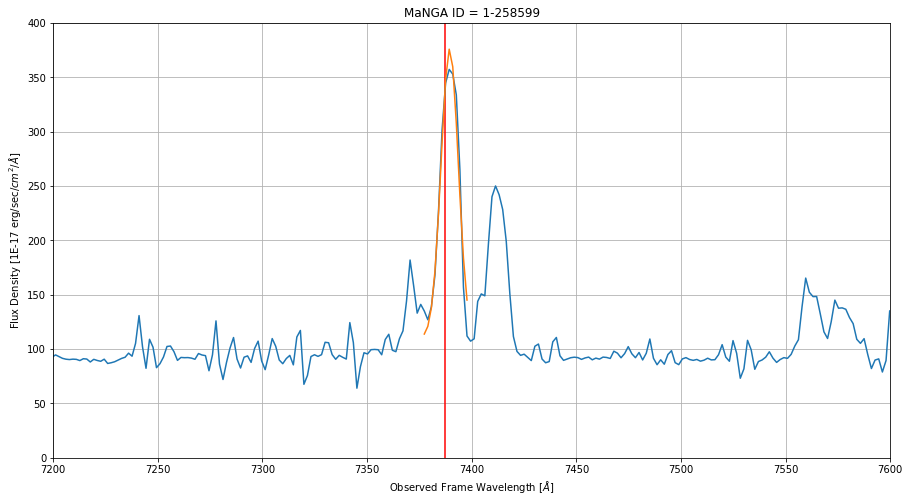

popt [1.97120312e+02 7.42743593e+03 2.77200106e+00 9.76919081e+01]
pcov [[ 4.43530349e+00 -8.71690745e-06 -1.18247180e-02 -1.12358803e+00]
 [-8.71690745e-06  9.59506470e-04  6.16653416e-08  1.41032614e-05]
 [-1.18247180e-02  6.16653416e-08  1.58352286e-03 -3.14529956e-02]
 [-1.12358803e+00  1.41032614e-05 -3.14529956e-02  1.58538458e+00]]


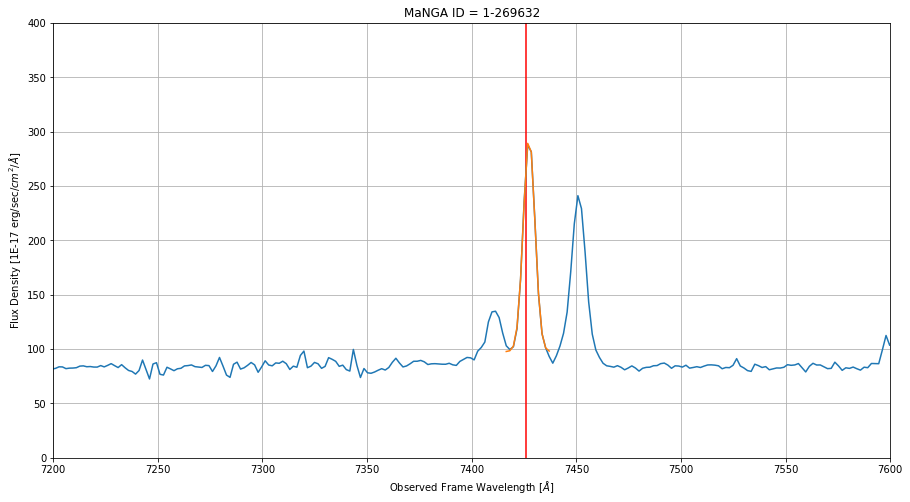

In [17]:
for plateifu in ha_list2:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak = 6563*(1+plateifu[1])
#     print(peak)
    bound = np.where(np.logical_and(wave > peak-10, wave < peak+13))
    lb = bound[0][0]
    ub = bound[0][-1]
    
    sumflux_slice = sumflux[lb : ub]
#     print(sumflux_slice)
    wave_slice = wave[lb : ub]
    
# #     print(sumflux)
    
    amp = max(sumflux_slice)
    mean = peak
    sigma = 5
#     sigma = np.std(sumflux_slice)
    base = min(sumflux_slice)
    
#     print('amp', amp)
#     print('sigma', sigma)
#     print('base', base)
    
    popt, pcov = curve_fit(gaussian, wave_slice, sumflux_slice, p0 = [amp, mean, sigma, base])
    print('popt', popt)
    print('pcov', pcov)
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red')
#     plt.axvline(6548*(1+plateifu[1]), color = 'green')
#     plt.axvline(6583*(1+plateifu[1]), color = 'green')
#     plt.axvline(wave[lb], color = 'deeppink')
#     plt.axvline(wave[ub], color = 'deeppink')
#     plt.xlim(6300,6700)
    plt.xlim(7200, 7600)
#     plt.xlim(wave[lb]-10, wave[ub]+10)
    plt.ylim(0,400)
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    plt.plot(wave_slice, gaussian(wave_slice, *popt))
    
    plt.show()